# `CODE TO DETECT SPAM E-MAILS USING NAIVE BAYES`

## PROBLEM STATEMENT

- The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

- The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.


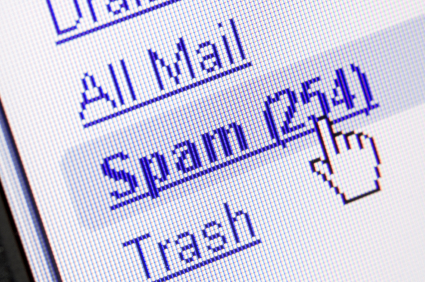

## LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## IMPORT DATASET

In [2]:
spam_df = pd.read_csv("emails.csv")

In [3]:
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [4]:
spam_df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [5]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


## VISUALIZE DATASET

In [7]:
ham = spam_df[spam_df['spam']==0]

In [8]:
spam = spam_df[spam_df['spam']==1]

In [9]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
1373,Subject: ben zhang any suggestions ? - g - ...,0
1374,Subject: manoj gupta - interview schedule att...,0
1375,Subject: re : hello from vince kaminski at enr...,0
1376,Subject: candlestick charts fyi fallout - - ...,0
1377,Subject: faculty information sheet mr . kamin...,0


In [10]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [11]:
spam_percentage = float(len(spam))/len(spam_df)
ham_percentage = float(len(ham))/len(spam_df)
print( 'Spam percentage = %s%%' %(spam_percentage*100))
print( 'Ham percentage = %s%%' %(ham_percentage*100))

Spam percentage = 23.8826815642%
Ham percentage = 76.1173184358%


0    4360
1    1368
Name: spam, dtype: int64


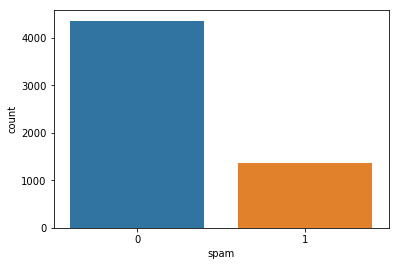

In [12]:
print(spam_df.spam.value_counts())
sns.countplot(spam_df['spam'], label = "Count") 

## CREATE TESTING AND TRAINING DATASET/DATA CLEANING

### APPLY COUNT VECTORIZER

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])


In [14]:
print(vectorizer.get_feature_names())

[u'00', u'000', u'0000', u'000000', u'00000000', u'0000000000', u'000000000003619', u'000000000003991', u'000000000003997', u'000000000005168', u'000000000005409', u'000000000005411', u'000000000005412', u'000000000005413', u'000000000005820', u'000000000006238', u'000000000006452', u'000000000007494', u'000000000007498', u'000000000007876', u'000000000010552', u'000000000011185', u'000000000012677', u'000000000012734', u'000000000012735', u'000000000012736', u'000000000012738', u'000000000012741', u'000000000012987', u'000000000013085', u'000000000013287', u'000000000015384', u'000000000015793', u'000000000023619', u'000000000024099', u'000000000025307', u'000000000025312', u'000010220', u'0000102317', u'0000102374', u'0000102789', u'0000104281', u'0000104282', u'0000104486', u'0000104631', u'0000104730', u'0000104776', u'0000104778', u'0000107043', u'0000108729', u'000066', u'0001', u'000166', u'0002', u'000202', u'0003', u'0004', u'0005', u'0006', u'00076', u'0009249480', u'00092494

In [15]:
print(spamham_countvectorizer.toarray())  

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [4 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [16]:
spamham_countvectorizer.shape

(5728, 37303)

## TRAINING THE MODEL WITH ALL DATASET

In [17]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
label = spam_df['spam'].values
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
testing_sample = ['Free money!!!', "Hi Kim, Please let me know if you need any further information. Thanks"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)


In [19]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0], dtype=int64)

In [20]:
# Mini Challenge!
testing_sample = ['Hello, I am Ryan, I would like to book a hotel in Bali by January 24th', 'money viagara!!!!!']


In [21]:
testing_sample = ['money viagara!!!!!', "Hello, I am Ryan, I would like to book a hotel in SF by January 24th"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0], dtype=int64)

## DIVIDE THE DATA INTO TRAINING AND TESTING PRIOR TO TRAINING

In [22]:
X = spamham_countvectorizer
y = label

In [23]:
X.shape

(5728, 37303)

In [24]:
y.shape

(5728L,)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
# from sklearn.naive_bayes import GaussianNB 
# NB_classifier = GaussianNB()
# NB_classifier.fit(X_train, y_train)

## EVALUATING THE MODEL 

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

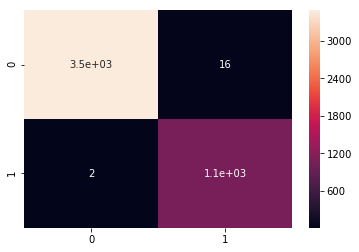

In [29]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

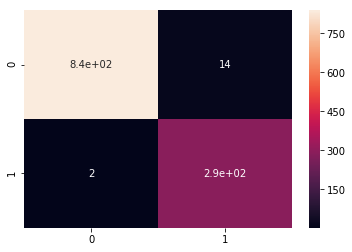

In [30]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [31]:
print(classification_report(y_test, y_predict_test))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99       852
          1       0.95      0.99      0.97       294

avg / total       0.99      0.99      0.99      1146

